In [1]:
import urllib.request

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

from scipy.io import loadmat
from scipy import signal

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

## # Download the data

In [2]:
urllib.request.urlretrieve(
    "https://github.com/micw523/be481datafiles/blob/main/train_data.mat?raw=true",
    "train_data.mat"
)
urllib.request.urlretrieve(
    "https://github.com/micw523/be481datafiles/blob/main/test_data.mat?raw=true",
    "test_data.mat"
)

('test_data.mat', <http.client.HTTPMessage at 0x16c6a74f0>)

## # Import the data for training 

In [3]:
data_mat = loadmat('train_data.mat')
data = data_mat['data'][0]
label = data_mat['label'][0]

len(data), len(label)

(300, 300)

## # Helper functions

In [4]:
def avg_pwr(single_signal):
    return np.sum(np.abs(single_signal) ** 2) / len(single_signal)


In [5]:
def cclab_pca(EEG_data):

    # 1. Standardizing the data
    EEG_std = StandardScaler().fit_transform(EEG_data)

    # 2. Compute the covariance matrix
    cov_matrix_EEG = np.cov(EEG_std)

    # 3. Compute the eigenvectors and eigenvalues
    eigenvalues_EEG, eigenvectors_EEG = np.linalg.eig(cov_matrix_EEG)

    # 4. Sort the eigenvectors by decreasing eigenvalues
    sorted_indices_EEG = np.argsort(eigenvalues_EEG)[::-1]
    eigenvectors_sorted_EEG = eigenvectors_EEG[:, sorted_indices_EEG]

    # 5. Select the top eigenvector (first principal component)
    first_principal_component = eigenvectors_sorted_EEG[:, 0]

    return first_principal_component

In [6]:
def plot_confusion_matrix(y_true, y_pred, classes, cmap=plt.cm.Blues):
    """
    Plot the confusion matrix.
    """
    # Compute the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap=cmap,
                xticklabels=classes,
                yticklabels=classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.savefig('Confusion Matrix', dpi=300)
    plt.show()

## # Decoding results

In [7]:
h, w = len(data), 11  # 6 for power in frequency bands, 5 for summary stats
all_features = [[0 for x in range(w)] for y in range(h)]

frq = ([1,4],[4,8],[8,12],[12,30],[30,90],[90,120])

for idx in range(len(data)):
    sample_signal = preprocessing.normalize(data[idx]).flatten()
    
    # Power in different frequency bands
    for item in range(len(frq)):
        sos = signal.butter(3, frq[item], 'bandpass', output='sos', fs=1000)
        filtered_signal = signal.sosfiltfilt(sos, sample_signal)
        all_features[idx][item] = avg_pwr(filtered_signal)
    
    # Summary stats
    all_features[idx][6] = np.min(sample_signal)
    all_features[idx][7] = np.max(sample_signal)
    all_features[idx][8] = np.average(sample_signal)
    all_features[idx][9] = np.var(sample_signal)
    all_features[idx][10] = np.std(sample_signal)


In [8]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(all_features, label, test_size=0.2, random_state=42)


### # LogisticRegression

Accuracy: 0.45


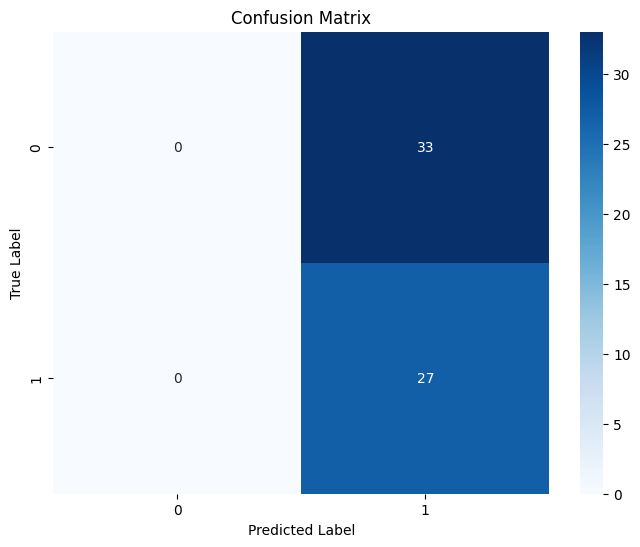

In [9]:
# Train a classification model (Logistic Regression in this example)
clf = LogisticRegression(max_iter = 100000)
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)

classes = sorted(list(set(y_test)))
plot_confusion_matrix(y_test, y_pred, classes)

### # Support Vector Machine

Accuracy of SVM classifier on training set: 0.73
Accuracy of SVM classifier on test set: 0.68


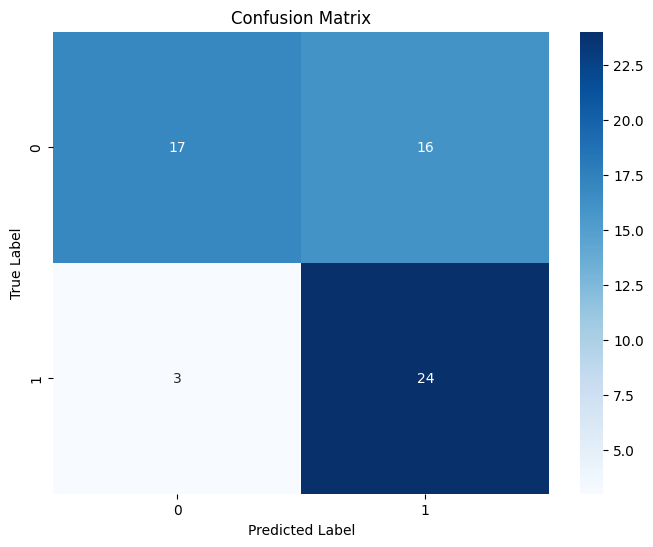

In [10]:
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

y_pred = svm.predict(X_test)
classes = sorted(list(set(y_test)))
plot_confusion_matrix(y_test, y_pred, classes)

### # GaussianNB

Accuracy of GNB classifier on training set: 0.74
Accuracy of GNB classifier on test set: 0.78


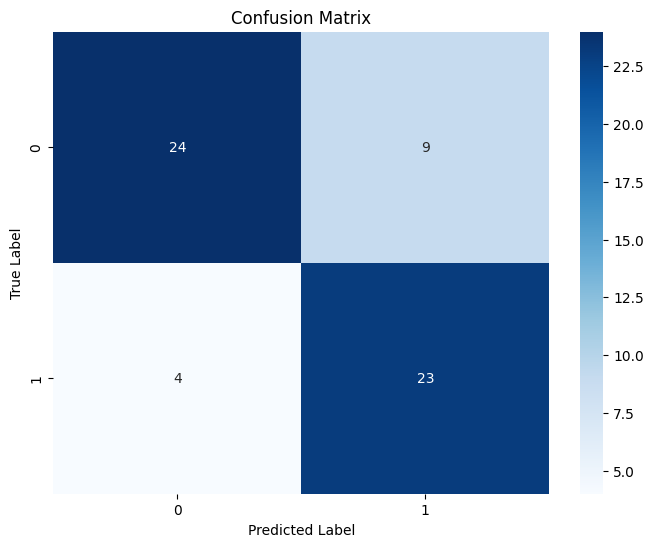

In [11]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

y_pred = gnb.predict(X_test)
classes = sorted(list(set(y_test)))
plot_confusion_matrix(y_test, y_pred, classes)

### # Linear Discriminant Analysis

Accuracy of LDA classifier on training set: 0.79
Accuracy of LDA classifier on test set: 0.83


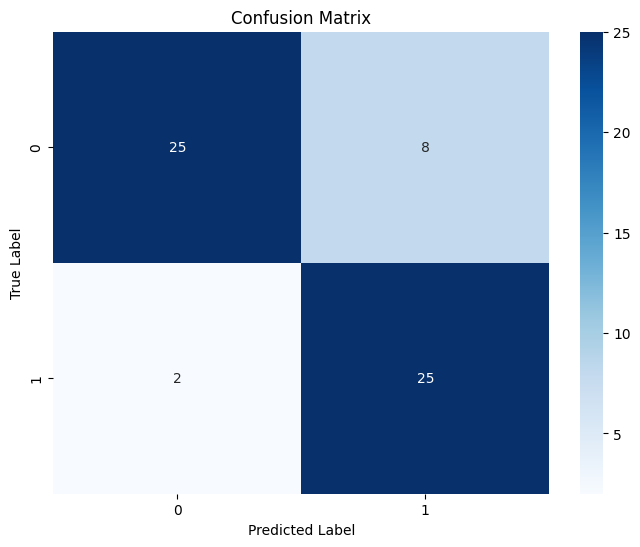

In [12]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

y_pred = lda.predict(X_test)
classes = sorted(list(set(y_test)))
plot_confusion_matrix(y_test, y_pred, classes)

### # K-Neighbors Classifier

Accuracy of K-NN classifier on training set: 0.80
Accuracy of K-NN classifier on test set: 0.73


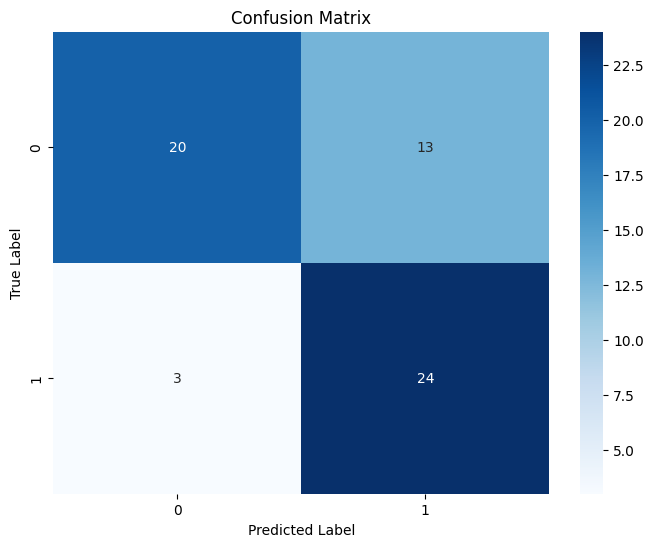

In [13]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

y_pred = knn.predict(X_test)
classes = sorted(list(set(y_test)))
plot_confusion_matrix(y_test, y_pred, classes)

### # Decision Tree Classifier

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.68


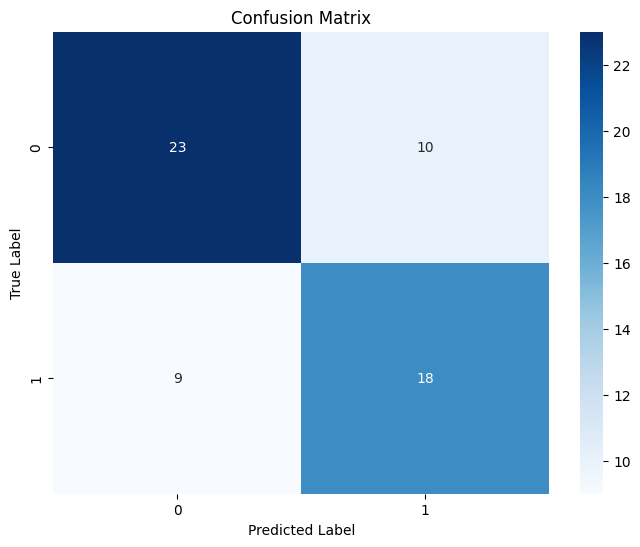

In [14]:
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

y_pred = clf.predict(X_test)
classes = sorted(list(set(y_test)))
plot_confusion_matrix(y_test, y_pred, classes)

## # Import the data for Kaggle 

In [15]:
kaggle_data_mat = loadmat('test_data.mat')
kaggle_data = kaggle_data_mat['data'][0]

len(kaggle_data)

104

In [16]:
h, w = len(kaggle_data), 11  # 6 for power in frequency bands, 5 for summary stats
all_features = [[0 for x in range(w)] for y in range(h)]

frq = ([1,4],[4,8],[8,12],[12,30],[30,90],[90,120])

for idx in range(len(kaggle_data)):
    sample_signal = preprocessing.normalize(kaggle_data[idx]).flatten()
    
    # Power in different frequency bands
    for item in range(len(frq)):
        sos = signal.butter(3, frq[item], 'bandpass', output='sos', fs=1000)
        filtered_signal = signal.sosfiltfilt(sos, sample_signal)
        all_features[idx][item] = avg_pwr(filtered_signal)
    
    # Summary stats
    all_features[idx][6] = np.min(sample_signal)
    all_features[idx][7] = np.max(sample_signal)
    all_features[idx][8] = np.average(sample_signal)
    all_features[idx][9] = np.var(sample_signal)
    all_features[idx][10] = np.std(sample_signal)


In [17]:
y_pred = lda.predict(all_features)

idx = np.linspace(1, len(y_pred), len(y_pred))
idx = idx.astype(int)
df = pd.DataFrame({'Case': idx, 'Predicted': y_pred})
# The index=False gets rid of the index pandas generated for you
df.to_csv('predicted.csv', index=False)

In [18]:
y_pred.shape

(104,)